## Análisis exploratorio del dataset **Medical Cost Personal**

### 1. Imports

En esta sección voy a importar las librerías para el análisis exploratorio.

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

### 2. Exploración de datos

Este notebook lo estoy trabajando en un ambiente de conda y editado con VSCode, el csv de datos lo dispongo en la misma carpeta donde está el notebook.

In [2]:
df_medical_cost = pd.read_csv('insurance.csv')

In [3]:
# Mostramos los 5 primeros registros para comprobar que el dataset se ha cargado correctamente
df_medical_cost.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Mostramos los nombres y el tipo de dato de las columnas del dataframe

In [4]:
df_medical_cost.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Tenemos 3 campos que tienen datos categóricos, que son sex, smoker y region.
Hay 4 campos numéricos, dos de tipo entero, children y age, y dos de tipo coma flotante, bmi y charges.

De [kaggle](https://www.kaggle.com/code/caiodata777/smoker-prediction-with-medical-costs-data-97-9-ac), recupero la información de la explicación de cada una de las columnas, para dar contexto al dataset

- **age**: age of primary beneficiary

- **sex**: insurance contractor gender, female, male

- **bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

- **children**: Number of children covered by health insurance / Number of dependents

- **smoker**: Smoking

- **region**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

- **charges**: Individual medical costs billed by health insurance



Mostramos información estadística de las variables numéricas.

In [5]:
df_medical_cost.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


Comprobamos si hay alguna columna que tiene valores nulos

In [6]:
df_medical_cost.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No hay columnas con datos nulos.

### 3. Análisis visual

Hacemos un histograma de cada uno de las columnas de datos para ver la distribución de valores.

7


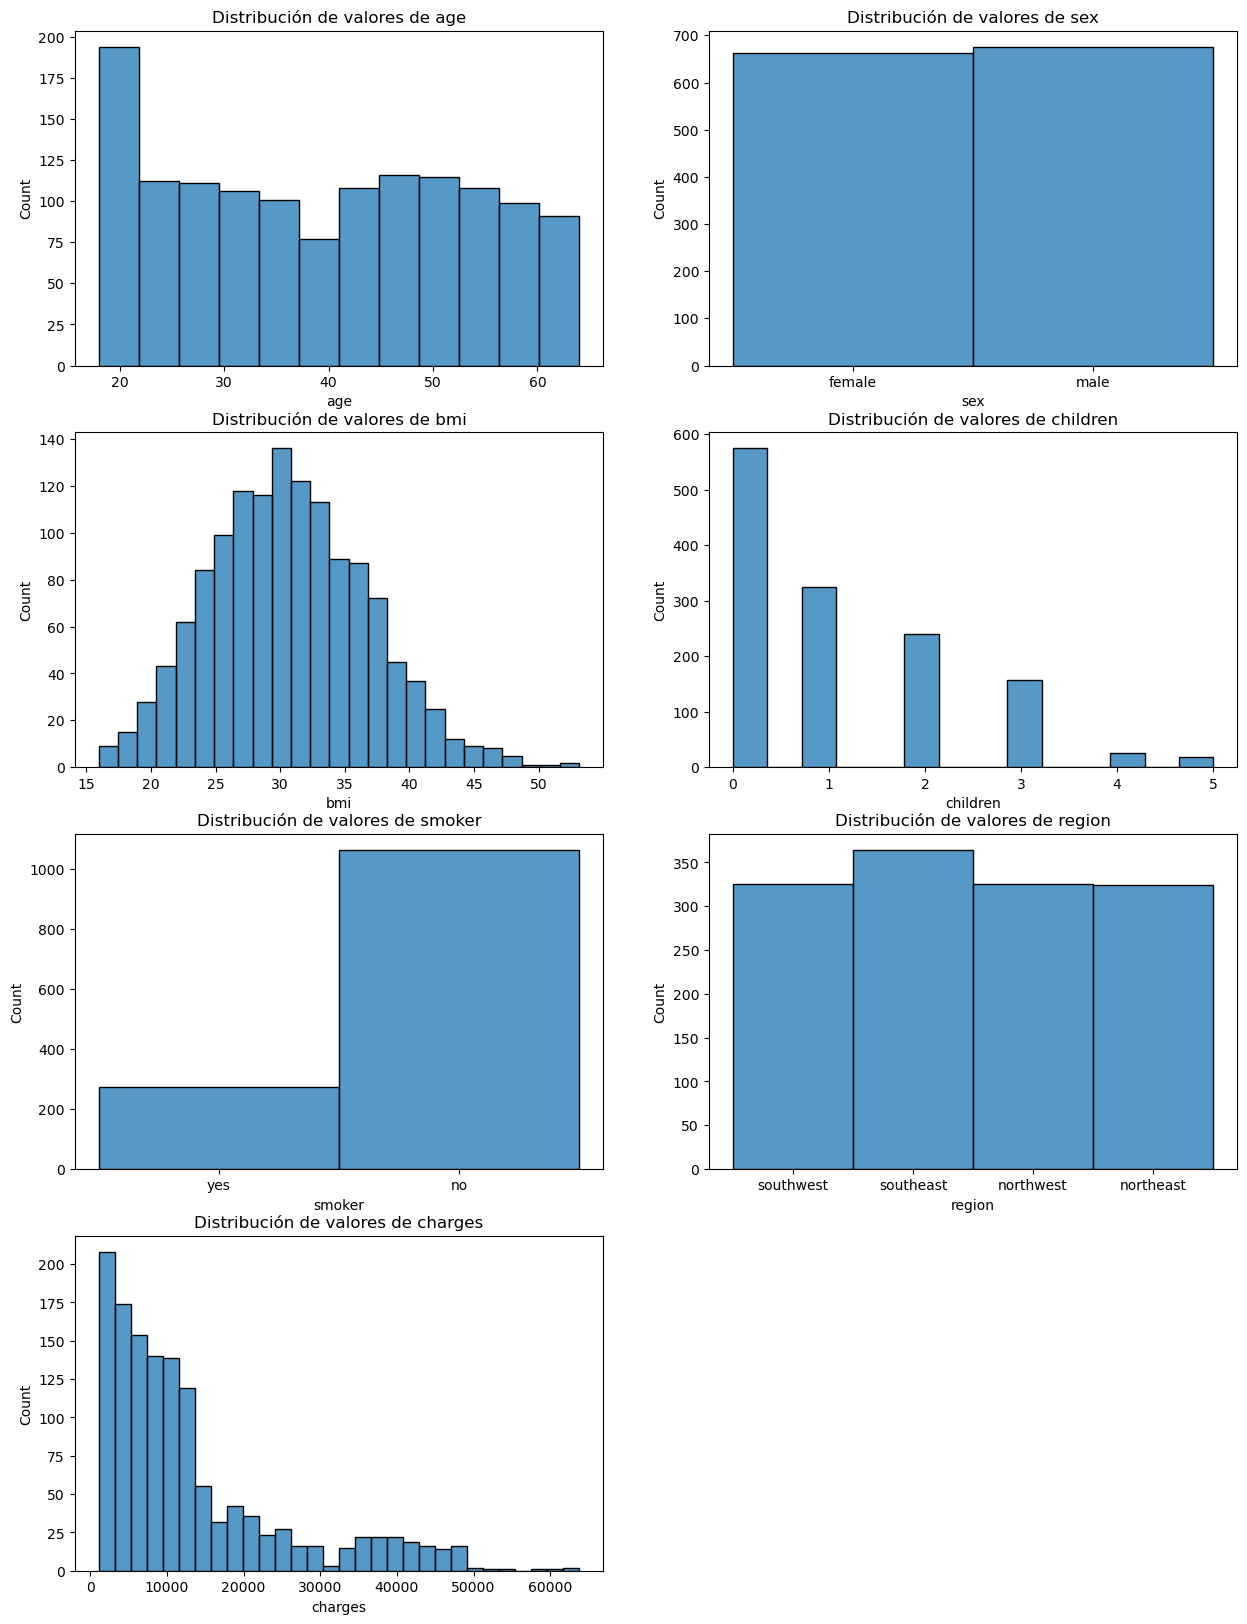

In [32]:
columnas = df_medical_cost.columns

numero_columnas = len(columnas)
print(numero_columnas)

numero_rows = int(np.ceil(numero_columnas / 2))

fig, axs = plt.subplots(numero_rows, 2, figsize=(15, 20))

counter = 0

for columna in columnas:
    row = int(np.floor(counter / 2))
    column = counter % 2
    
    sns.histplot(ax=axs[row, column], data=df_medical_cost, x=columna)
    axs[row, column].set_title(f'Distribución de valores de {columna}')
    axs[row, column].set_axis_on()
    counter += 1


# El último ax, lo podemos eliminar
if counter <= numero_columnas:    
    axs.flat[-1].set_axis_off()


plt.show()

Los histogramas nos muestran lo siguiente:

- La distribución del muestreo referente a los campos de sexo y región siguen una distribución que es aproximadamente uniforme, ya que tenemos practicamente igual para cada variable del campo.

- No es así para la distribución de fumadores, que hay una mayor cantidad de no fumadores.

- La distribución de edad ese casi uniforme para todos los rangos de edades, menos para la edad de menos de 20 años, que hay un muestreo mayor.

- La distribución del indice bmi, sigue una distribución normal.

- El número de niños y los cargos, siguen una distribución asimétrica hacia la derecha. A mayor rango valor, menos registros obtenemos con ese rango.


Para los campós de tipo categórico, podemos hacer un gráfico que muestre los gastos por cada una de los valores de la columna

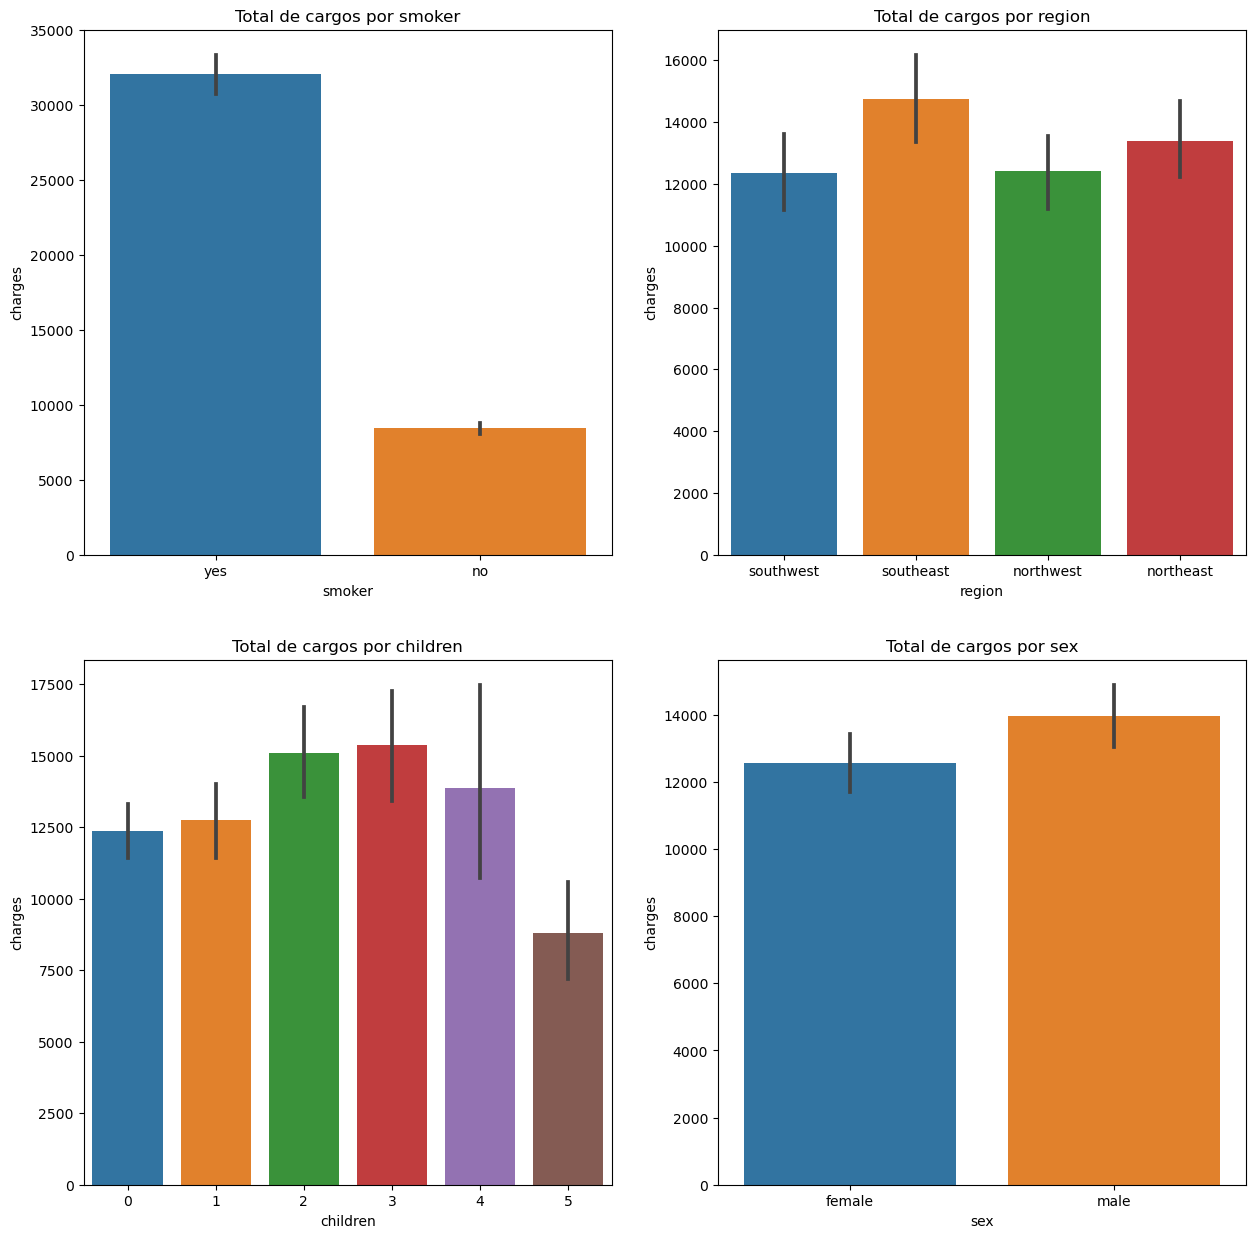

In [35]:
categoricas = ['smoker', 'region', 'children', 'sex']

fig, axs = plt.subplots(2, 2, figsize=(15, 15))

counter = 0

for cat in categoricas:
    row = int(np.floor(counter / 2))
    column = counter % 2
    
    sns.barplot(ax=axs[row, column], data=df_medical_cost, x=cat, y='charges')
    axs[row, column].set_title(f'Total de cargos por {cat}')    
    counter += 1

plt.show()

Estás gráficas lo que demuestran es que los cargos son mucho mayores para los fumadores, mientras que para las demás variables categoricas no influyen tanto en la distribución de cargos

A continuación mostramos un gráfico que nos mostrará la relación de cargos por edad, y si es fumador o no.

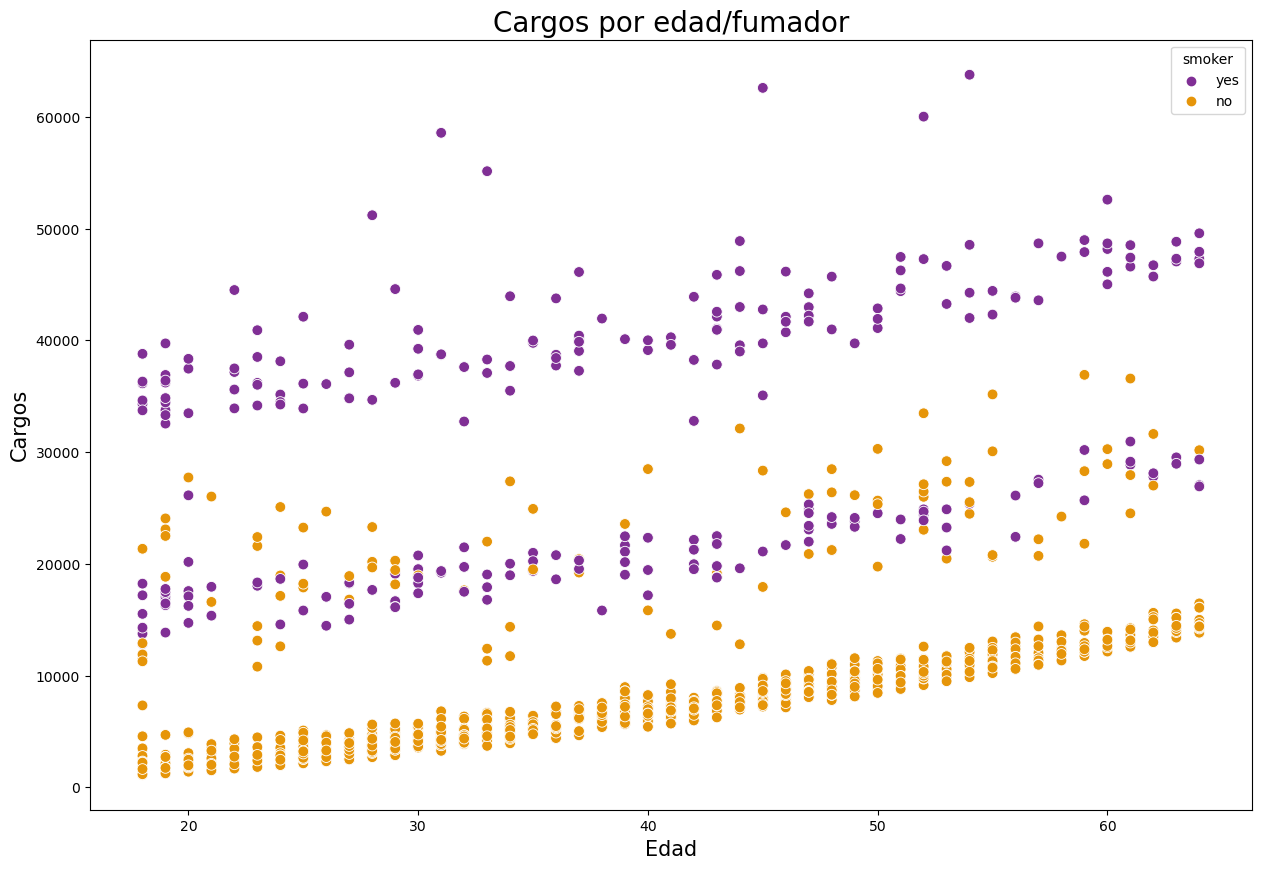

In [42]:
plt.figure(figsize=(15,10))

plt.title('Cargos por edad/fumador', fontsize=20)
sns.scatterplot(data=df_medical_cost, x='age', y='charges', hue='smoker', palette='CMRmap', s=60)
plt.ylabel('Cargos', fontsize=15)
plt.xlabel('Edad', fontsize=15)
plt.show()

En esta gráfica vemos que hay más cargos mayores para los fumadores, y que van aumentando de una forma más o menos lineal con la edad.

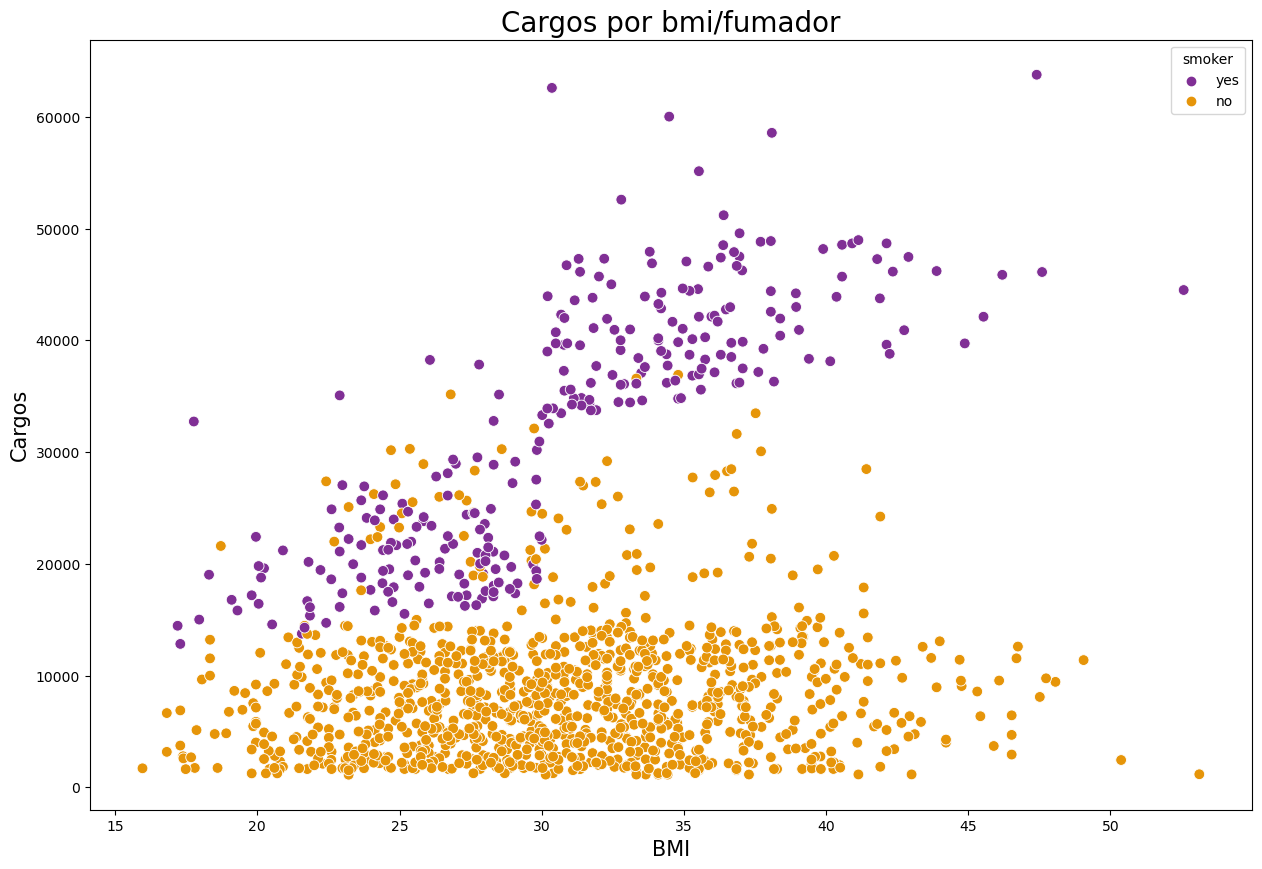

In [44]:
plt.figure(figsize=(15,10))

plt.title('Cargos por bmi/fumador', fontsize=20)
sns.scatterplot(data=df_medical_cost, x='bmi', y='charges', hue='smoker', palette='CMRmap', s=60)
plt.ylabel('Cargos', fontsize=15)
plt.xlabel('BMI', fontsize=15)
plt.show()

Esta gráfica nos muestra que a mayor bmi, siendo fumador, los cargos son mayores, mientras que para los no fumadores, el bmi no influye tanto a nivel de gastos.

#### Mapa de correlaciones

/tmp/ipykernel_13082/4129811900.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_medical_cost.corr(), annot=True, cmap='coolwarm', cbar=True, linewidths=0, linecolor='white',)


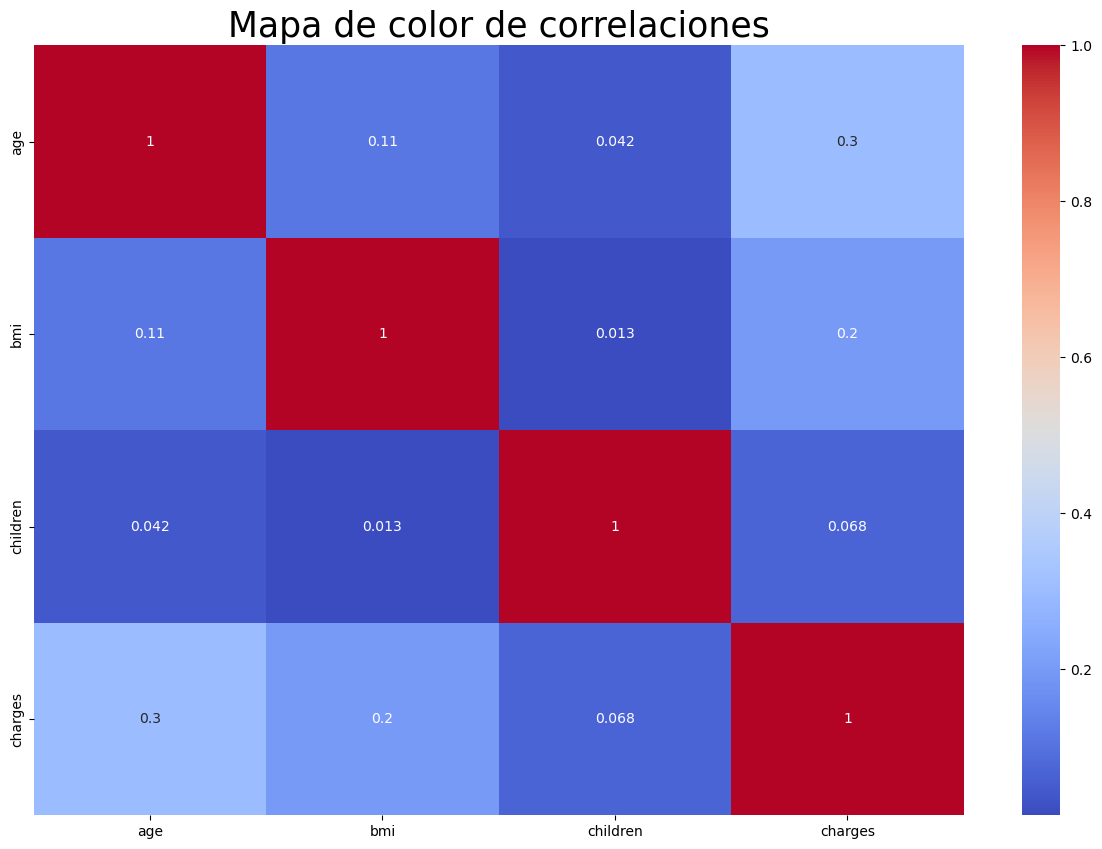

In [56]:
def mapa_correlacion():
    plt.figure(figsize=(15,10))
    plt.title('Mapa de color de correlaciones', fontsize=25)

    sns.heatmap(df_medical_cost.corr(), annot=True, cmap='coolwarm', cbar=True, linewidths=0, linecolor='white',)    
    plt.show()

mapa_correlacion()


Esta gráfica nos muestra las correlaciones entre las variables numéricas entre ellas, vemos que ninguna de estas variables numéricas presentan ninguna relación entre ellas.

Vamos a repetir el mapa de correlación, convirtiendo en numéricas las variables categóricas.

In [57]:
label_encoder = LabelEncoder()

label_encoder.fit(df_medical_cost['sex'].drop_duplicates())
df_medical_cost['sex'] = label_encoder.transform(df_medical_cost['sex'])

label_encoder.fit(df_medical_cost['smoker'].drop_duplicates())
df_medical_cost['smoker'] = label_encoder.transform(df_medical_cost['smoker'])

label_encoder.fit(df_medical_cost['region'].drop_duplicates())
df_medical_cost['region'] = label_encoder.transform(df_medical_cost['region'])

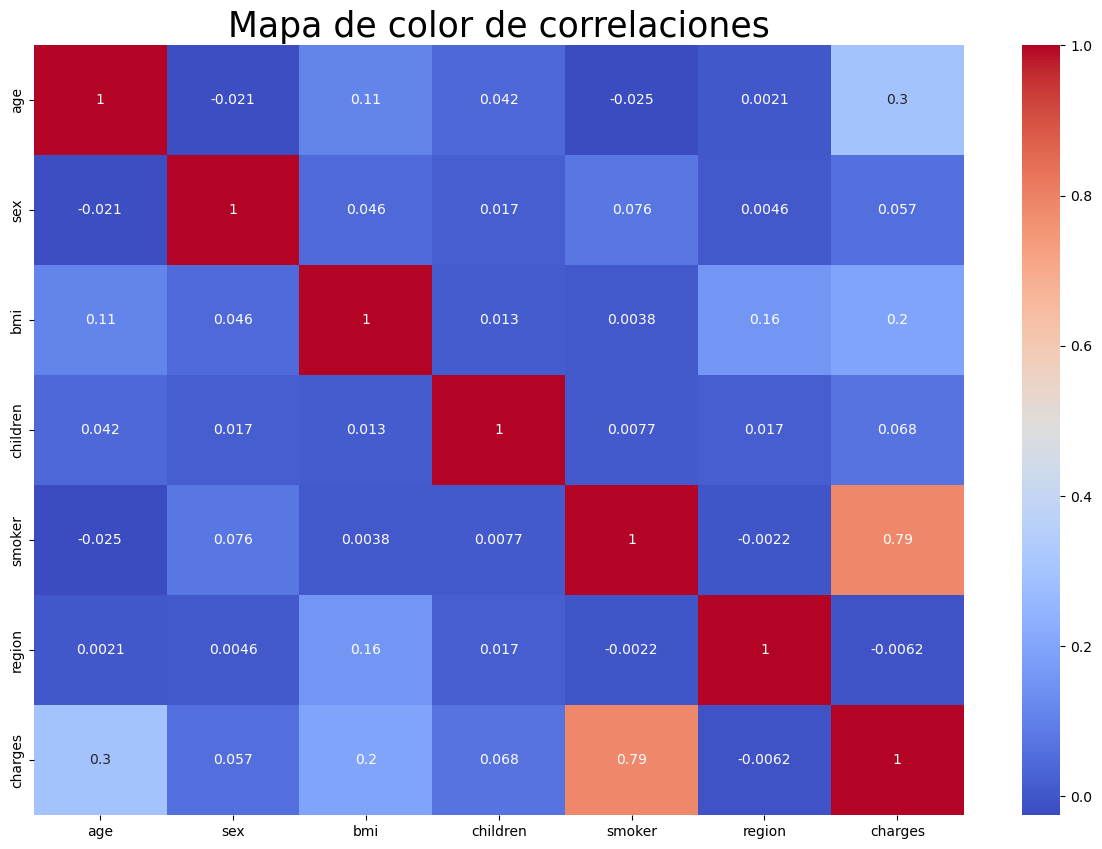

In [58]:
mapa_correlacion()

En este caso si que vemos una clara correlación de los cargos con la variable fumador, tal como habíamos visto en los gráficos de barra. La conclusión es que la probabilidad de tener mayores cargos es más alta si eres fumador.